In [44]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(train_input, train_target), (test_input, test_target) =\
    fashion_mnist.load_data()

train_input_scaled = train_input / 255.0
test_input_scaled = test_input / 255.0

train_input_scaled, val_input_scaled, train_target, val_target =\
    train_test_split(train_input_scaled, train_target, test_size=0.2, random_state=1234)

print(train_input_scaled.shape, train_target.shape)
print(val_input_scaled.shape, val_target.shape)
print(test_input_scaled.shape, test_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)
(10000, 28, 28) (10000,)


In [5]:
def CreateModel(a_layer=None):
    
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(Dense(10, activation='softmax'))
    
    return model

In [6]:
model = CreateModel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Training with epochs=5

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=5,
    verbose=0
)

In [9]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy
0,0.534757,0.812292
1,0.392563,0.859833
2,0.355268,0.871979
3,0.336822,0.881542
4,0.324159,0.887250


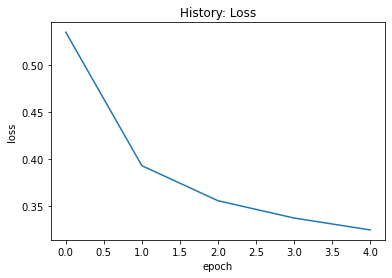

''

In [11]:
plt.plot(history_df['loss'])

plt.title('History: Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()
;

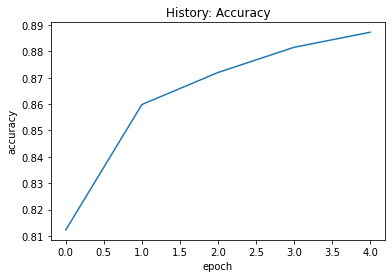

''

In [13]:
plt.plot(history_df['accuracy'])

plt.title('History: Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()
;

## Training with epochs=20

In [14]:
model = CreateModel()
model.compile(
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0
)

history_df = pd.DataFrame(history.history)

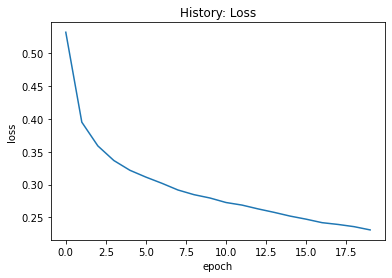

''

In [15]:
plt.plot(history_df['loss'])

plt.title('History: Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()
;

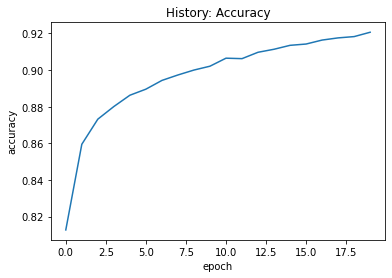

''

In [16]:
plt.plot(history_df['accuracy'])

plt.title('History: Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()
;

### Overfitting or Underfitting?

In [17]:
model = CreateModel()

model.compile(
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target)
)

history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.529857,0.812333,0.403903,0.854000
1,0.390800,0.860313,0.438654,0.841750
2,0.355671,0.873750,0.399298,0.858500
3,0.333858,0.881708,0.345466,0.879250
4,0.321545,0.887021,0.365369,0.868833
5,0.308704,0.890854,0.349952,0.879667
6,0.300725,0.894771,0.367097,0.873917
7,0.294489,0.897313,0.375666,0.874417
8,0.286058,0.901042,0.381339,0.875250
9,0.280033,0.903354,0.360122,0.881417


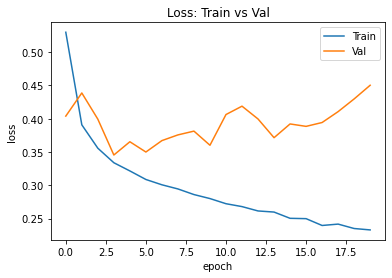

''

In [18]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.title('Loss: Train vs Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'])

plt.show()
;

## Optimizer Hyperparameters!

#### Adam

In [19]:
model = CreateModel()

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target)
)

history_df = pd.DataFrame(history.history)

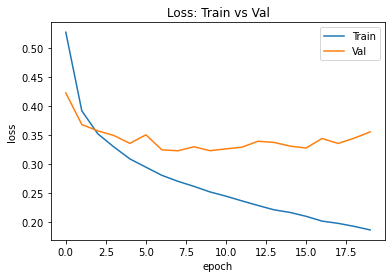

''

In [20]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.title('Loss: Train vs Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'])

plt.show()
;

#### RMSprop

In [21]:
model = CreateModel()

model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target)
)

history_df = pd.DataFrame(history.history)

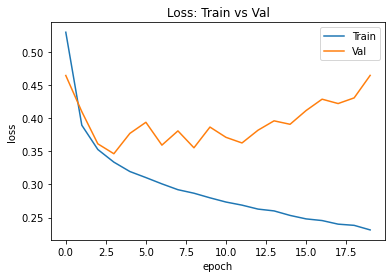

''

In [22]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.title('Loss: Train vs Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'])

plt.show()
;

#### Dropout with Adam

In [24]:
model = CreateModel(Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target)
)

history_df = pd.DataFrame(history.history)

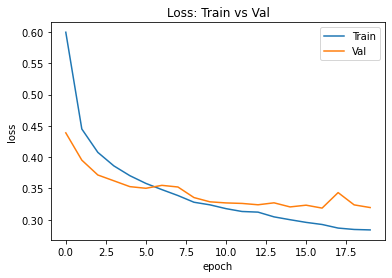

''

In [26]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.title('Loss: Train vs Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'])

plt.show()
;

## Saving and Retrieving Model

In [28]:
model = CreateModel(Dropout(0.3))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=10,
    verbose=0,
    validation_data=(val_input_scaled, val_target)
)

history_df = pd.DataFrame(history.history)

In [29]:
# Save all the parameters
model.save_weights('model-weights.h5')
# Save both of model structure and all the parameters
model.save('model-whole.h5')

In [30]:
# Check out if the files are saved properly!
from os import listdir

dir_list = listdir()

for element in dir_list:
    if element[-3:] == '.h5':
        print(element)

best-model.h5
model-weights.h5
model-whole.h5


#### Evaluating with 'model-weights.h5'

In [31]:
model = CreateModel(Dropout(0.3))
model.load_weights('model-weights.h5')

In [32]:
# Keep in mind that shown belos is 12,000 X 10 matrix

model.predict(val_input_scaled).shape

(12000, 10)

In [35]:
# Extract the index of the Max Predicted Target from every validate input
val_pred = np.argmax(model.predict(val_input_scaled), axis=1)
val_pred.shape

(12000,)

In [36]:
# Take out the % of accurately predicted items!

print('Score:', np.mean(val_pred == val_target))

Score: 0.8789166666666667


#### Evaluating with 'model-whole.h5'

In [39]:
from tensorflow.keras.models import load_model

model = load_model('model-whole.h5')
model.evaluate(val_input_scaled, val_target)

375/375 [==============================] - 0s 928us/step - loss: 0.3352 - accuracy: 0.8789


[0.3352169394493103, 0.8789166808128357]

## Callback: ModelCheckpoint

In [42]:
model = CreateModel(Dropout(0.3))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

modelCKP = ModelCheckpoint('best-model.h5')

model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target),
    callbacks=[modelCKP]
)

In [43]:
model = load_model('best-model.h5')
model.evaluate(val_input_scaled, val_target)

375/375 [==============================] - 0s 950us/step - loss: 0.3304 - accuracy: 0.8811


[0.33035504817962646, 0.8810833096504211]

## Callback: ModelCheckpoint + EarlyStopping

In [45]:
model = CreateModel(Dropout(0.3))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy'
)

modelCKP = ModelCheckpoint('best-model.h5')
earlySTP = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(
    train_input_scaled,
    train_target,
    epochs=20,
    verbose=0,
    validation_data=(val_input_scaled, val_target),
    callbacks=[modelCKP, earlySTP]
)

In [46]:
# Stopped Epoch
print(earlySTP.stopped_epoch)

11


In [47]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.594527,0.790688,0.476112,0.825417
1,0.443536,0.841563,0.419180,0.843583
2,0.406461,0.853646,0.376189,0.861083
3,0.382957,0.859042,0.373701,0.861917
4,0.368433,0.864583,0.355329,0.867083
5,0.354747,0.869729,0.339146,0.875833
6,0.343963,0.872292,0.338287,0.875417
7,0.335055,0.877354,0.342116,0.869833
8,0.327088,0.879146,0.324649,0.878750
9,0.319355,0.879854,0.321126,0.881833


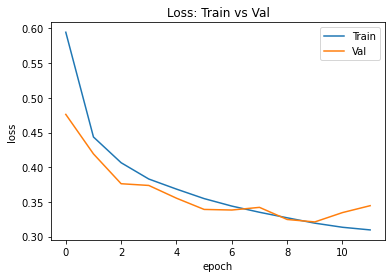

''

In [48]:
plt.plot(history_df['loss'])
plt.plot(history_df['val_loss'])

plt.title('Loss: Train vs Val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'])

plt.show()
;

In [50]:
model.evaluate(val_input_scaled, val_target)

375/375 [==============================] - 0s 887us/step - loss: 0.3211 - accuracy: 0.8818


[0.3211261034011841, 0.8818333148956299]